# Buzzfeed / Wins LGBTQ in America Exploratory Data Analysis
Brittany Bennett | June 2019



In [1]:
# import necessary packages
import pyreadstat
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dfpvizpy.dfpvizpy import dfpSave


In [2]:
# read in the .sav file
df, meta = pyreadstat.read_sav("WINS LGBTQ in America Survey - Final_SPSS_060818 (1).sav")


In [3]:
# let's take a look at what we're working with
df.head()

,responseid,respid,status,interview_start,interview_end,surveystatus,pid,psid,loi,qs1,...,qd16,qd17,weight1,VARA8F4010F18414AF49050,VARA8F4012BFF89411488FD,VARA8F4012CE77E42AA88A9,VARA8F4013021324B0A8635,VARA8F4013E88DB4C70B25A,VARA8F401404B0B4884B37B,VARA8F401418C1647C38D94
0,4.0,4.0,complete,2018-05-24,2018-05-24,1.0,1462008235,c-3eTjThveZo88GCLWW--Q**,1460.49,7.0,...,5.0,5.0,1.349406,2.0,1.0,1.0,4.0,3.0,1.0,3.0
1,7.0,7.0,complete,2018-05-24,2018-05-24,1.0,1453665890,c-3eTjThveawXOCmuOx-PQ**,759.78,8.0,...,5.0,4.0,1.175335,1.0,1.0,2.0,2.0,3.0,1.0,3.0
2,9.0,9.0,complete,2018-05-24,2018-05-24,1.0,1454242097,c-3eTjThveZxI5BkOsbbuA**,1546.62,8.0,...,5.0,6.0,0.880285,1.0,1.0,3.0,1.0,4.0,1.0,1.0
3,10.0,10.0,complete,2018-05-24,2018-05-24,1.0,1412734485,c-3eTjThveatmDPdiuBbRg**,1464.15,7.0,...,5.0,1.0,1.306463,2.0,1.0,1.0,2.0,NaN,2.0,1.0
4,11.0,11.0,complete,2018-05-24,2018-05-24,1.0,1458793597,c-3eTjThveZvKIihjUEdUg**,1110.68,8.0,...,4.0,3.0,1.044140,2.0,2.0,4.0,5.0,NaN,6.0,1.0


## Representation in the survey
How many bi, lesbian, and gay people responded to the survey?

In [4]:
# select the columns that cover: 
# 'Code Audience - Transgender',
# 'Code Audience - Gay Men',
# 'Code Audience - Lesbian Women',
# 'Code Audience - Bisexual All Genders',
# 'Code Audience - Queer, Non-binary',
# 'Code Audience - Straight Cis',
# 'Code Audience - Prefer not to answer',
# 'Code Audience - Would not satisfy Code 1-5',
    
identity_answers = [22,23,24,25,26,27,28,29]

In [5]:
# The 
identity_matrix = df.iloc[:,identity_answers]
identity_matrix.columns = ["Transgender", "Gay", "Lesbian","Bisexual", "Queer", "Striaght Cis", "Prefer not to answer", "N/A"]


In [6]:
identity_matrix = identity_matrix.sum().reset_index()
identity_matrix.columns = ["identity", "number"]
identity_matrix

,identity,number
0,Transgender,51.0
1,Gay,267.0
2,Lesbian,132.0
3,Bisexual,400.0
4,Queer,73.0
5,Striaght Cis,0.0
6,Prefer not to answer,0.0
7,N/A,0.0


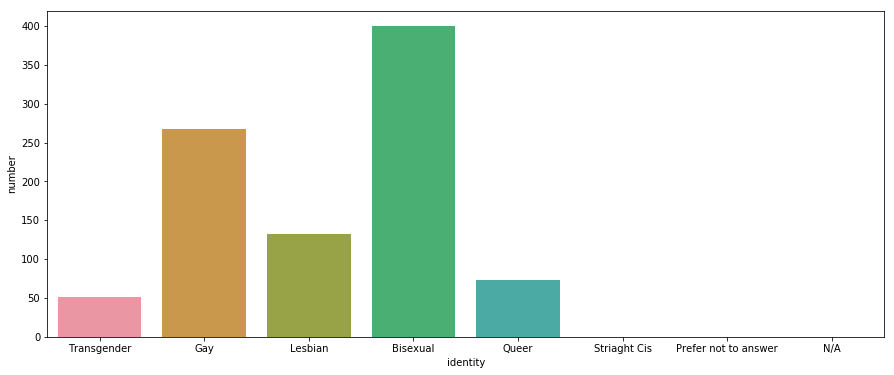

In [7]:
large_dims = (15, 6)
fig, ax = plt.subplots(figsize=large_dims)
sns.barplot(x = identity_matrix.identity, y = identity_matrix.number)

## Gay Politics

### Registered to Vote

In [193]:
# segment out the relevant parts of the data frame
# q52
registered_to_vote = df.loc[:,["qs8_1", "qs8_2", "qs8_3","qs8_4","qs8_5","qs8_6","qs8_7","qs8_8","q52",]]
registered_to_vote.columns = ["Transgender", "Gay", "Lesbian","Bisexual", "Queer", "Striaght Cis", "Prefer not to answer", "N/A", "Registered to Vote?"]

identities_all = registered_to_vote.iloc[:, 0:7 ].replace(1, pd.Series(registered_to_vote.columns, registered_to_vote.columns))
identities_all = identities_all.bfill(axis = 1).iloc[:,0].to_frame()

registered_to_vote = pd.concat([identities_all, df.loc[:,"q52"]], axis = 1)
registered_to_vote.columns = ["identity", "registered"]
registered_to_vote = registered_to_vote.replace(2.0, 0)


registered_to_vote = registered_to_vote.groupby("identity")["registered"].apply(lambda x: round(x.sum()/x.count(),4)*100)
registered_to_vote= registered_to_vote.to_frame()
registered_to_vote


,registered
identity,
Bisexual,82.46
Gay,94.38
Lesbian,91.67
Queer,79.17
Transgender,78.43


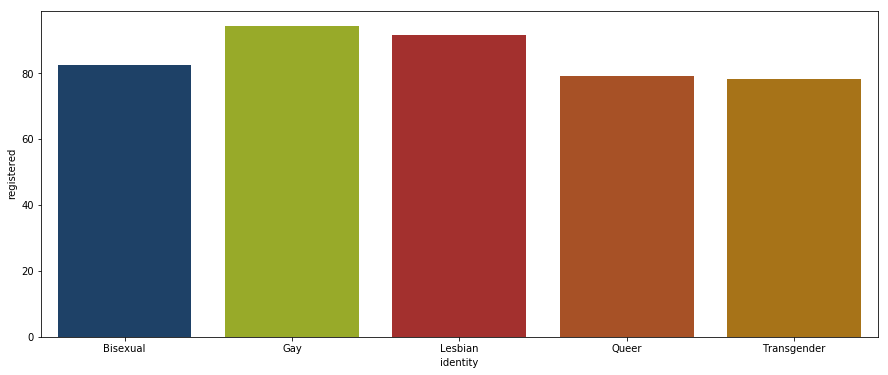

In [197]:
fig, ax = plt.subplots(figsize=large_dims)
sns.barplot(x = registered_to_vote.index, y = registered_to_vote["registered"])

In [23]:
index = pd.DataFrame(meta.column_labels)
df_index = pd.DataFrame(df.columns)
index = pd.concat([df_index, index], axis = 1)
index.columns = ["shorthand", "full_name"]

In [24]:
index.loc[index["shorthand"] == "q52"]

,shorthand,full_name
247,q52,Are you registered to vote?
